In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
app_df = pd.read_csv('application_data.csv')
prev_df = pd.read_csv('previous_application.csv')

In [4]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data Cleaning

In [9]:
cols_30_percent_missing_values = (prev_df.columns[(round(100*(prev_df.isnull().sum()/len(prev_df.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [10]:
prev_df = prev_df.drop(cols_30_percent_missing_values,axis=1)

In [11]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [12]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']
prev_df = prev_df.drop(cols_irrelevant,axis=1)


In [13]:
prev_df.shape

(1670214, 22)

In [14]:
# Percent of missing values in columns
(round(100*(prev_df.isnull().sum()/len(prev_df.index)),2))

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

In [15]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(prev_df[np.isnan(prev_df['AMT_ANNUITY']) & np.isnan(prev_df['CNT_PAYMENT']) & np.isnan(prev_df['AMT_GOODS_PRICE'])])


333855

In [16]:
prev_df = prev_df[(~(np.isnan(prev_df['AMT_ANNUITY']) & np.isnan(prev_df['AMT_GOODS_PRICE']) & np.isnan(prev_df['CNT_PAYMENT'])))]


In [17]:
prev_df.shape

(1336359, 22)

In [18]:
(round(100*(prev_df.isnull().sum()/len(prev_df.index)),2))

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               2.87
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           3.87
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               2.87
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.00
dtype: float64

In [19]:
# Count the rows for which AMT_ANNUITY is empty
len(prev_df[np.isnan(prev_df['AMT_ANNUITY'])])


38380

In [20]:
# As there are only 38380 rows we can delte those records
prev_df = prev_df[~(np.isnan(prev_df['AMT_ANNUITY']))]

### Removing outliers

In [21]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = prev_df[col].quantile(0.25)
    q3 = prev_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    prev_df = prev_df.loc[(prev_df[col] > range_low) & (prev_df[col] < range_high)]

prev_df.shape

(839576, 22)

In [22]:
# Percentage of rows lost
round((100 - 100*(len(prev_df.index)/1670214)),2)

49.73

### Checking Data Imbalance

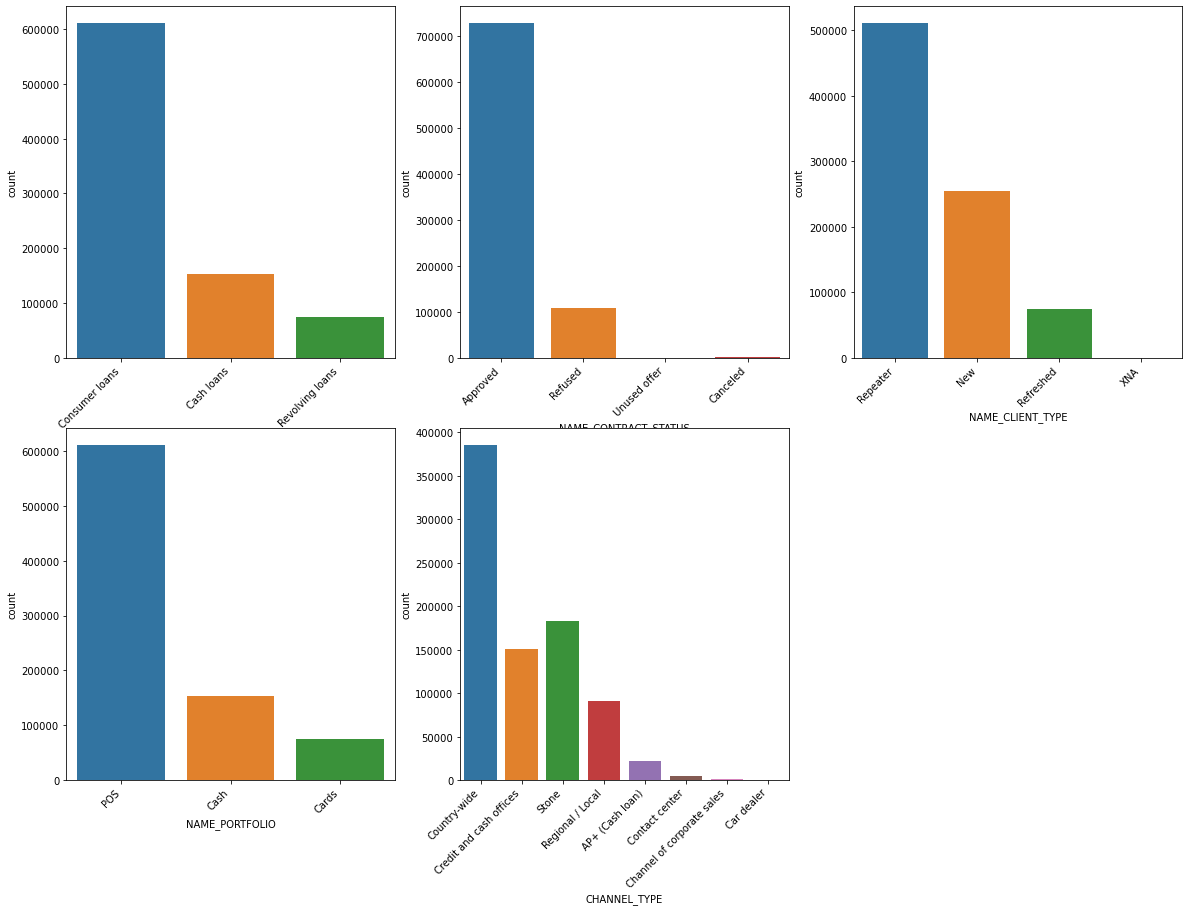

In [23]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = prev_df )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

* NAME_CONTRACT_TYPE - There are veru few Revolving Loans
* NAME_CONTRACT_STATUS - There are very few Refused loans. Almost negligible Canceled loans.
* NAME_CLIENT_TYPE - There are very few New applicant. Even fewer Refreshed applicants.
* NAME_PORTFOLIO - Very few application for Cards and Cars
* CHANNEL_TYPE - Except Country-Wide, Credit and Cash offices and Stone all other channels are very few in muber.

In [24]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
prev_df['MONTH_DECISION'] = abs(prev_df['DAYS_DECISION']//30)

# Drop 'DAYS_DECISION' column
prev_df = prev_df.drop(['DAYS_DECISION'],axis=1)

In [25]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,...,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,3
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,11
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,53779.5,XAP,Approved,Cash through the bank,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,8.0,low_action,POS household without interest,14
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,26550.0,XAP,Approved,Cash through the bank,...,Construction Materials,POS,XNA,Stone,83,Consumer electronics,3.0,middle,POS household with interest,25
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,126490.5,XAP,Approved,Cash through the bank,...,Auto Accessories,POS,XNA,Regional / Local,130,Industry,6.0,low_normal,POS other with interest,24


In [26]:
prev_df.shape

(839576, 22)

In [27]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
app_df['AGE'] = abs(app_df['DAYS_BIRTH']//365)

# Drop 'DAYS_BIRTH' column
app_df = app_df.drop(['DAYS_BIRTH'],axis=1)

In [28]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [29]:
#Creating new column AGE_GROUP
app_df['AGE_GROUP'] = app_df['AGE'].apply(age_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,53,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,Mid Age


In [30]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [31]:
#Creating new column INCOME_GROUP
app_df['INCOME_GROUP'] = app_df['AMT_INCOME_TOTAL'].apply(income_group)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,26,Young,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,46,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,53,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,53,Mid Age,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,55,Mid Age,Medium


In [32]:
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP']


In [33]:
# Creating a dataset from current application for merging 
df_current_to_merge = app_df[cols_current]
df_current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High
1,100003,0,F,Higher education,Married,Mid Age,High
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium


In [34]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [35]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = prev_df.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0,middle,3
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,high,11
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,XAP,Approved,Cash through the bank,XAP,New,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,8.0,low_action,14
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,XAP,Approved,Cash through the bank,XAP,New,Construction Materials,POS,XNA,Stone,Consumer electronics,3.0,middle,25
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,XAP,Approved,Cash through the bank,XAP,New,Auto Accessories,POS,XNA,Regional / Local,Industry,6.0,low_normal,24


In [36]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,...,Connectivity,12.0,middle,3,0.0,F,Incomplete higher,Married,Mid Age,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,...,XNA,12.0,high,11,0.0,F,Secondary / secondary special,Married,Young,Low
2,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,XAP,Approved,Cash through the bank,XAP,...,Consumer electronics,8.0,low_action,14,NaN,NaN,NaN,NaN,NaN,NaN
3,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,XAP,Approved,Cash through the bank,XAP,...,Consumer electronics,3.0,middle,25,NaN,NaN,NaN,NaN,NaN,NaN
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,XAP,Approved,Cash through the bank,XAP,...,Industry,6.0,low_normal,24,0.0,M,Secondary / secondary special,Married,Young,High


In [37]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]    

In [38]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [39]:
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,...,Connectivity,12.0,middle,3,0,F,Incomplete higher,Married,Mid Age,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,...,XNA,12.0,high,11,0,F,Secondary / secondary special,Married,Young,Low
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,XAP,Approved,Cash through the bank,XAP,...,Industry,6.0,low_normal,24,0,M,Secondary / secondary special,Married,Young,High
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,XAP,Approved,Cash through the bank,XAP,...,Consumer electronics,8.0,high,50,0,M,Secondary / secondary special,Married,Mid Age,Medium
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Everyday expenses,Refused,XNA,HC,...,XNA,18.0,high,20,0,M,Secondary / secondary special,Married,Senior,High


In [40]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,...,12.0,middle,3,0,F,Incomplete higher,Married,Mid Age,High,100.00
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,...,12.0,high,11,0,F,Secondary / secondary special,Married,Young,Low,121.28
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,XAP,Approved,Cash through the bank,XAP,...,6.0,low_normal,24,0,M,Secondary / secondary special,Married,Young,High,94.75
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,XAP,Approved,Cash through the bank,XAP,...,8.0,high,50,0,M,Secondary / secondary special,Married,Mid Age,Medium,101.27
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Everyday expenses,Refused,XNA,HC,...,18.0,high,20,0,M,Secondary / secondary special,Married,Senior,High,109.90


### Data imbalance Ratio

In [41]:
# Client with payment difficulties (Target=1)
df_previous_target_1 = df_merged[df_merged['TARGET'] == 1]
df_previous_target_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,PERCENT_CREDIT
9,1676258,433469,Cash loans,22242.825,247500.00,268083.00,XNA,Approved,XNA,XAP,...,18.0,high,63,1,F,Higher education,Married,Mid Age,Medium,108.32
26,1912041,253391,Cash loans,5294.430,45000.00,47970.00,XNA,Refused,Cash through the bank,HC,...,12.0,high,26,1,F,Secondary / secondary special,Single / not married,Young,Low,106.60
28,1760006,283527,Cash loans,14730.660,72000.00,72000.00,XNA,Approved,XNA,XAP,...,6.0,high,7,1,M,Secondary / secondary special,Single / not married,Young,High,100.00
91,1676862,294352,Consumer loans,22173.795,129060.00,116154.00,XAP,Approved,Cash through the bank,XAP,...,6.0,middle,58,1,F,Secondary / secondary special,Married,Mid Age,High,90.00
107,2537421,123100,Consumer loans,3778.650,30271.59,33268.59,XAP,Approved,Cash through the bank,XAP,...,10.0,low_normal,9,1,M,Secondary / secondary special,Married,Young,High,109.90


In [42]:
# Client with payment difficulties (Target=0)
df_previous_target_0 = df_merged[df_merged['TARGET'] == 0]
df_previous_target_0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,...,CNT_PAYMENT,NAME_YIELD_GROUP,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,...,12.0,middle,3,0,F,Incomplete higher,Married,Mid Age,High,100.00
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,...,12.0,high,11,0,F,Secondary / secondary special,Married,Young,Low,121.28
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,XAP,Approved,Cash through the bank,XAP,...,6.0,low_normal,24,0,M,Secondary / secondary special,Married,Young,High,94.75
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,XAP,Approved,Cash through the bank,XAP,...,8.0,high,50,0,M,Secondary / secondary special,Married,Mid Age,Medium,101.27
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Everyday expenses,Refused,XNA,HC,...,18.0,high,20,0,M,Secondary / secondary special,Married,Senior,High,109.90


In [43]:
df_previous_target_0.shape

(660277, 26)

In [44]:
df_previous_target_1.shape

(56989, 26)

### Imbalance ratio

In [45]:
print("Percentage of defaulters: ", df_previous_target_1.shape[0]*100/(df_previous_target_1.shape[0]+df_previous_target_0.shape[0]))

Percentage of defaulters:  7.945308992758614


So the ratio of defaulters to non-defaulters is approximately 8:92 = 2:23 .

# Analysis

## Univariate Analysis

[Text(0.5, 0, 'Loan status')]

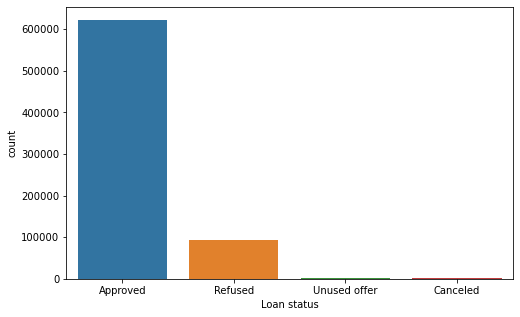

In [46]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')

There are huge number of Approved loan than Refused. Hardly, there are any Canceled or Unused offer loan.



[Text(0.5, 0, 'Client type')]

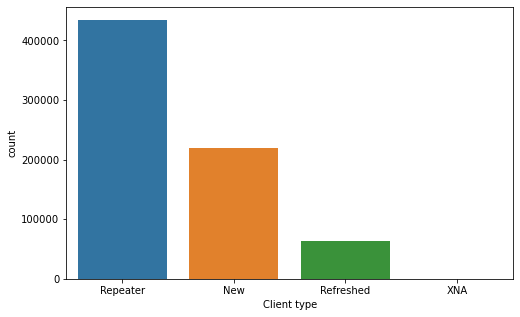

In [47]:
#client type
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')

Mostly the applicants were Repeater



[Text(0.5, 0, 'Portfolio')]

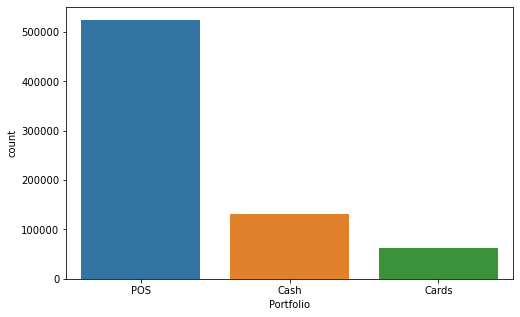

In [48]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')


The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.



[Text(0.5, 0, 'Application channel')]

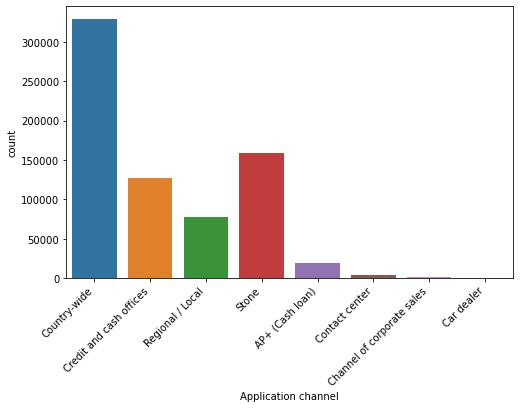

In [49]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

We see that Country-wide was heavily used for previous applications followed by Credit and Cash offices, Stone and Regional. Rest other channels are hardly used.



[Text(0.5, 0, 'Application amount')]

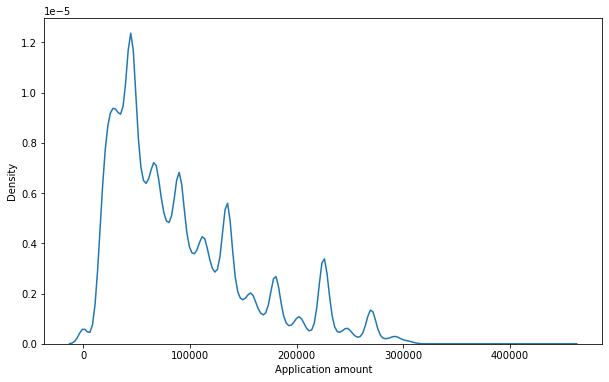

In [50]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

Most of the applications were for the amount of below 250000 as we see from the above distribution.



[Text(0.5, 0, 'Credited amount')]

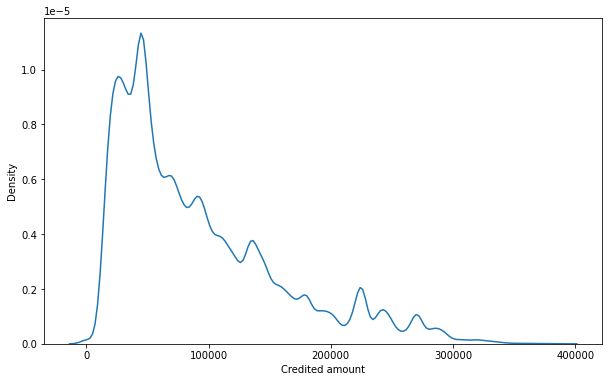

In [51]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

The distribution of the credited amount of the loan was mostly in 250000 range.



## Bivariate Analysis

In [52]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [53]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12.0,3
1,112500.0,136444.5,15060.735,121.28,12.0,11
4,126490.5,119853.0,21307.455,94.75,6.0,24
5,26955.0,27297.0,4187.340,101.27,8.0,50
7,45000.0,49455.0,4666.500,109.90,18.0,20


In [54]:
# Corelation matrix
df_merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.000000,0.964599,0.802134,0.148355,0.217301,-0.248801
AMT_CREDIT,0.964599,1.000000,0.803071,0.312781,0.244638,-0.269258
AMT_ANNUITY,0.802134,0.803071,1.000000,0.195212,0.161211,-0.172753
PERCENT_CREDIT,0.148355,0.312781,0.195212,1.000000,0.288485,-0.243058
CNT_PAYMENT,0.217301,0.244638,0.161211,0.288485,1.000000,0.100149
MONTH_DECISION,-0.248801,-0.269258,-0.172753,-0.243058,0.100149,1.000000


<AxesSubplot:>

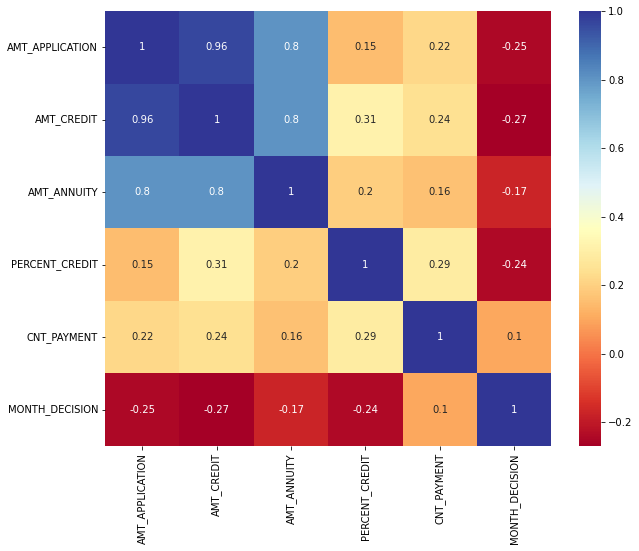

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="RdYlBu",annot=True)

#### Highly corelate columns

* AMT_APPLICATION and AMT_CREDIT
* AMT_APPLICATION and AMT_ANNUITY
* AMT_CREDIT and AMT_ANNUITY



#### Moderately corelated columns

* AMT_APPLICATION and CNT_PAYMENT\
* AMT_CREDIT and CNT_PAYMENT

### Application amount and Credit amount

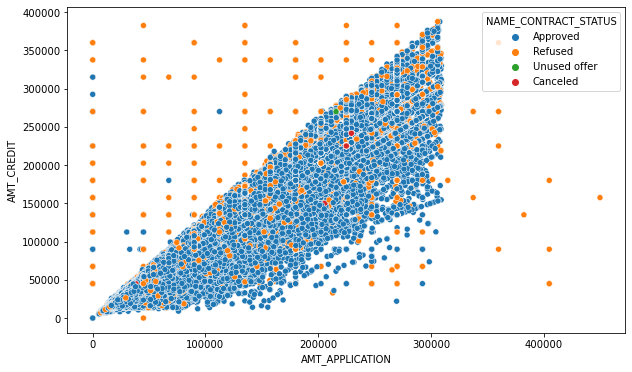

In [56]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

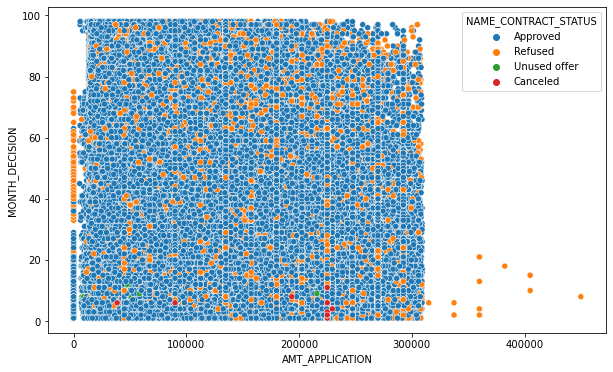

In [57]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)

We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application.



In [58]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

In [ ]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

* Cash loans are more credited in amount than Revolving and Consumer loans.
* Repeater clients get more amount loan than new and refreshed clients.
* The loan with portfolio Cars are more amount credited followed by Cash.
* The credit amount of the loan is more from the application channel type as car dealer followed by Channel of corporate sales, Credit and cash offices and Contact center. The amount is very less for Regional, Stone and Country-wide channels.

### Status and Client type

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )


We see that the Repeater clients have more approved loans than New and Refreshed clients.



### Current loan defaulter status with respect to previous loan application status


In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.



### Current loan defaulter status with respect to previous loan application status and client types


In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


* We can see that the Defaulters are more for previously Unused offers loan status clients, who were New.
* For previously Approved status the New clients were more defaulted followed by Repeater.
* For previously Refused applicants the Defaulters are more Refreshed clients.
* For previously Canceled applicants the Defaulters are more New clients.

### Current loan defaulter status with respect to previous loan application status and age group


In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

* For all the previous status Young applicants are more defaulted.
* For all the previous status Senior applicants are less defaulted compared to others.

### Current loan defaulter status with respect to previous loan application status and portfolio of the loan


In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


* Most of the clients were defaulted, who previously applied loan for Cards.
* For approved loan status the clients applied for Cars are less defaulted.
* For Refused loan status the clients applied for POS are less defaulted.

### Current loan defaulter status with respect to previous loan application status and income group


In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

* For previously Unused offer the Medium income group was more defaulted and Low income group is the least.
* For other application status more or less all the income groups are equally defaulted.